In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [14]:
df= pd.read_csv('panama_dataset.csv')
df.dropna(inplace=True)
describe = df.describe()
print(describe)

       target_variable       T2M_toc      QV2M_toc       TQL_toc       W2M_toc
count     48048.000000  48048.000000  48048.000000  48048.000000  48048.000000
mean       1182.868647     27.399111      0.018313      0.079979     13.391049
std         192.068896      1.675462      0.001607      0.065589      7.295502
min          85.192500     22.953455      0.012054      0.000000      0.008979
25%        1020.056900     26.160455      0.017236      0.026451      7.544958
50%        1168.427700     27.118051      0.018590      0.065201     12.182103
75%        1327.563950     28.558344      0.019521      0.117310     18.661282
max        1754.882000     35.039575      0.022690      0.521240     39.229726


In [15]:
x = df
y = df["target_variable"]
df.shape
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(df)
s2 = MinMaxScaler(feature_range=(0,1))
ys = s2.fit_transform(df[['target_variable']])

In [16]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(ys[i])
X,Y = np.array(X), np.array(Y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf    

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(units=32, return_sequences=True),
    tf.keras.layers.LSTM(units=32,return_sequences=True),
    tf.keras.layers.LSTM(units=32,return_sequences=True),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=1, activation='linear', name='output_layer')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_absolute_error')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1202/1202 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0769 - val_loss: 0.0175
Epoch 1/200 - Train Loss: 0.0434 - Val Loss: 0.0175
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0212 - val_loss: 0.0182
Epoch 2/200 - Train Loss: 0.0207 - Val Loss: 0.0182
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0211 - val_loss: 0.0164
Epoch 3/200 - Train Loss: 0.0199 - Val Loss: 0.0164
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0196 - val_loss: 0.0176
Epoch 4/200 - Train Loss: 0.0189 - Val Loss: 0.0176
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0182 - val_loss: 0.0143
Epoch 5/200 - Train Loss: 0.0178 - Val Loss: 0.0143
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0173 - val_loss: 0.0165
Epoch 6/200 - Train Loss: 0.0173 - Val Loss: 0.0165
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0173 - val_loss: 0.0178
Epoch 7/200 - Train Loss: 0.0173 - Val Loss: 0.0178
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0169 - val_loss: 0.0239
Epoch 8/200 - Train 

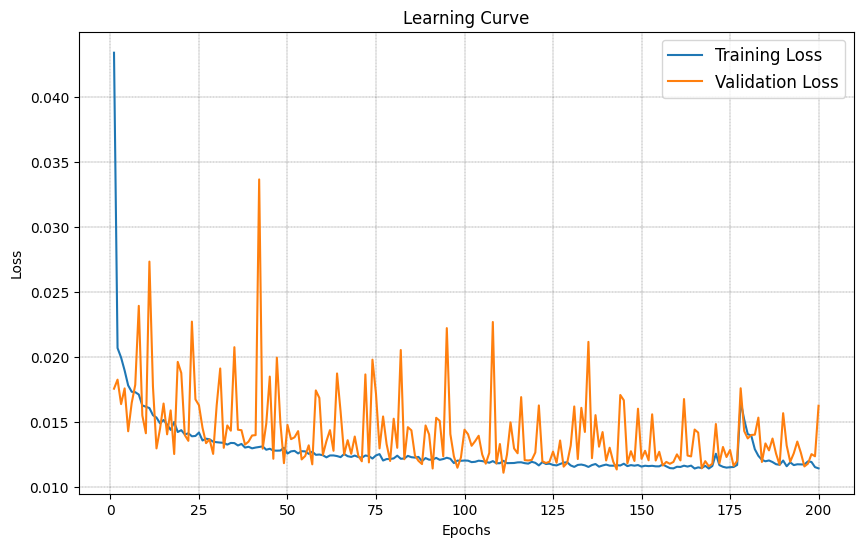

In [20]:
import time

import matplotlib.pyplot as plt

train_losses = []
val_losses = []

start = time.time()
epochs = 200

for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), 
                        verbose=1, batch_size=32)
    

    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print progress
    print(f'Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}')

end = time.time()
convergence_time = end - start


plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.2)
plt.legend(prop={"size":12})
plt.grid(True)

plt.show()

In [21]:
start= time.time()
y_pred= model.predict(X_test)
end= time.time()
inference_time= end-start

301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
y_pred = s2.inverse_transform(y_pred)
y_test = s2.inverse_transform(y_test)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [24]:

rmse= np.sqrt(mean_squared_error(y_test, y_pred))
mae =  mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse= mean_squared_error(y_test, y_pred)
nrmse = (rmse/np.mean(y_pred))*100
print("conergence time is:", convergence_time)
print("inference time is:",inference_time)
print("RMSE: ", rmse)
print("mae", mae)
print("mape", mape)
print("mse",mse)
print("nrmse", nrmse)

conergence time is: 534.0507259368896
inference time is: 0.5409479141235352
RMSE:  34.06190682141763
mae 27.10581751484001
mape 2.220992803609303
mse 1160.2134963109368
nrmse 2.861965511207832
